# Exercise 1
You work for a real estate company that would like to be more data-driven. \
You are the main expert of data and machine learning topics in the company. \
You are given a dataset containing real estate data in Milan.
> Hint: the dataset format is `.parquet`, you can open it with `pd.read_parquet(path)` after having installed `pandas` and `pyarrow`.

## Question 1
The company wants you to perform an exploratory data analysis for finding out some useful insights regarding the market.
> Note: there is not a unique correct answer, just do your best.


<b> Data Exploration and Data cleaning </b>

In [1]:
##Loading files and libraries importing
import pandas as pd
import pyarrow as py
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

sns.set()


pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth',3000)

pq_dir = r'directory_tree.parquet'

df_dir = pd.read_parquet(pq_dir,engine ='auto')

df_pro = pd.read_parquet('properties.parquet')

df_zone = pd.read_json('zones.geojson')


In [2]:
df_pro.head(10)

,area,bathrooms,construction_year,created_at,floor,latitude,longitude,has_elevator,has_parking_space,property_condition,residential_type,rooms,has_garden,has_terrace,building_floors,price,garage_sqm,distance_from_airport,distance_from_canal,distance_from_cemetery,distance_from_groceries,distance_from_hospital,distance_from_prison,distance_from_restaurant,distance_from_river,distance_from_secondary_street,distance_from_tourism_landmark,distance_from_metro,distance_from_main_street,distance_from_park,distance_from_school,distance_from_train_station,distance_from_train,distance_from_tram,distance_from_university
0,45.0,1,1940,2020-02-19,0.5,45.471800,9.110230,False,False,not-renovated,apartment,2,False,True,4,65000.0,NaN,11345.466428,1404.625825,1521.410028,158.635151,293.206596,1903.220851,488.861064,4657.033509,229.048302,1138.150120,804.652987,498.710514,152.253625,197.741853,3625.878511,3560.987203,995.568157,4681.550378
1,105.0,1,None,2021-07-20,0.5,45.486000,9.212310,False,False,not-renovated,apartment,3,False,False,0,0.0,NaN,4281.161813,1274.253735,2008.399182,107.030776,973.536185,3461.060853,82.487313,2738.515340,175.103968,440.648244,238.869554,164.809079,128.052150,107.983874,562.854001,405.431191,113.557912,1164.998524
2,75.0,1,None,2021-09-28,1.0,45.441815,9.170326,False,False,partially-renovated,apartment,2,False,False,None,270000.0,NaN,6926.761801,410.660889,4790.418731,217.951447,1111.829349,2071.402265,335.159428,6811.102163,445.028628,410.660889,240.776645,171.195837,154.906790,257.979442,1253.108733,145.990066,658.097846,397.383207
3,77.0,1,1980,2021-08-04,0.0,45.472250,9.140095,True,False,partially-renovated,apartment,4,False,False,None,60000.0,NaN,9033.201992,2958.045143,3065.496060,154.883926,387.977522,2222.647401,149.412372,5114.278496,904.650143,1323.919681,473.202452,317.134900,163.464322,155.500921,2795.564531,1985.518492,159.403856,2446.392566
4,38.0,1,1980,2021-11-10,1.0,45.469380,9.212610,True,False,partially-renovated,apartment,1,False,False,None,340000.0,NaN,3401.866879,3099.524650,3027.705058,143.194373,552.895837,2842.930728,129.543869,3223.745896,530.162140,720.320899,371.912958,351.892321,226.019753,118.750948,1416.505435,1699.217613,350.586175,761.481189
5,90.0,1,None,2021-02-17,1.0,45.442403,9.145323,False,False,partially-renovated,apartment,3,False,False,None,259000.0,NaN,8794.040760,334.180058,3755.803168,606.799529,1342.559639,2594.882980,48.402563,8346.646313,180.101795,936.962252,1720.129075,1014.910936,65.318790,75.276520,1187.792561,404.578049,317.714959,1284.613824
6,112.0,2,2021,2021-01-20,2.0,45.440300,9.195500,True,False,new,apartment,3,False,True,7,0.0,NaN,5155.156397,127.203023,4064.875168,258.501879,1544.842482,3158.310484,154.044283,5041.089697,325.543229,1558.637801,1333.954528,532.180388,136.442157,133.093577,1584.069545,541.880995,328.472644,994.667040
7,35.0,1,1960,2021-10-27,5.0,45.458300,9.089900,True,False,renovated,apartment,1,False,True,5,115000.0,NaN,12879.907040,1343.523121,563.264212,373.855031,514.145747,1545.287195,30.826894,6384.119401,367.773477,2798.715128,1830.348859,2546.809816,20.489947,191.538445,3611.295371,2882.320889,2759.326789,5895.934784
8,65.0,1,1940,2019-06-06,2.0,45.437800,9.193000,False,False,partially-renovated,apartment,2,False,False,2,190000.0,NaN,5452.064200,398.720805,3979.572293,154.435416,1823.569776,3232.003407,7.628985,5335.757421,61.795210,1410.629098,1413.432811,216.820671,138.810425,22.513962,1881.528840,813.377276,560.672657,834.423377
9,52.0,1,None,2021-05-19,2.0,45.463100,9.165500,True,False,renovated,apartment,2,False,False,3,540000.0,NaN,6971.181790,1111.451856,2564.208074,160.525150,439.195588,35.874050,27.159725,6833.785647,34.665319,431.813057,459.569977,1250.194941,216.230053,64.550109,976.751147,938.785543,117.591390,296.968843


In [3]:
df_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   area                            15000 non-null  float64       
 1   bathrooms                       15000 non-null  object        
 2   construction_year               10304 non-null  object        
 3   created_at                      15000 non-null  datetime64[ns]
 4   floor                           15000 non-null  float64       
 5   latitude                        15000 non-null  float64       
 6   longitude                       15000 non-null  float64       
 7   has_elevator                    15000 non-null  bool          
 8   has_parking_space               15000 non-null  bool          
 9   property_condition              15000 non-null  object        
 10  residential_type                15000 non-null  object        
 11  ro

In [4]:
df_pro.isnull().sum()/len(df_pro)*100.

area                                0.000000
bathrooms                           0.000000
construction_year                  31.306667
created_at                          0.000000
floor                               0.000000
latitude                            0.000000
longitude                           0.000000
has_elevator                        0.000000
has_parking_space                   0.000000
property_condition                  0.000000
residential_type                    0.000000
rooms                               0.000000
has_garden                          0.000000
has_terrace                         0.000000
building_floors                    27.260000
price                               0.000000
garage_sqm                        100.000000
distance_from_airport               0.000000
distance_from_canal                 0.000000
distance_from_cemetery              0.000000
distance_from_groceries             0.000000
distance_from_hospital              0.000000
distance_f

In [5]:
df_pro.nunique()

area                                385
bathrooms                            10
construction_year                   158
created_at                         1122
floor                                30
latitude                           4451
longitude                          6724
has_elevator                          2
has_parking_space                     1
property_condition                    4
residential_type                      7
rooms                                19
has_garden                            1
has_terrace                           2
building_floors                      29
price                              1270
garage_sqm                            0
distance_from_airport             10500
distance_from_canal               10500
distance_from_cemetery            10500
distance_from_groceries           10472
distance_from_hospital            10493
distance_from_prison              10497
distance_from_restaurant          10499
distance_from_river               10500


In [6]:
df_pro.drop(['garage_sqm'], axis=1, inplace=True)
df_pro.drop(['created_at'],axis=1, inplace=True)
df_pro.drop(['has_parking_space'],axis=1, inplace=True)
df_pro.drop(['has_garden'],axis=1, inplace=True)

#df_pro.loc[df_pro["floor"] == "None"] = 0
df_pro['floor']=df_pro['floor'].astype(int)
df_pro['price']=df_pro['price'].astype(int)
df_pro['rooms']=df_pro['rooms'].astype(int)
df_pro['bathrooms']=df_pro['bathrooms'].astype(int)
#df_pro['construction_year'].mask(df_pro['construction_year'] == 0, "None", inplace=True)


In [7]:
df_pro.isnull().sum()

area                                 0
bathrooms                            0
construction_year                 4696
floor                                0
latitude                             0
longitude                            0
has_elevator                         0
property_condition                   0
residential_type                     0
rooms                                0
has_terrace                          0
building_floors                   4089
price                                0
distance_from_airport                0
distance_from_canal                  0
distance_from_cemetery               0
distance_from_groceries              0
distance_from_hospital               0
distance_from_prison                 0
distance_from_restaurant             0
distance_from_river                  0
distance_from_secondary_street       0
distance_from_tourism_landmark       0
distance_from_metro                  0
distance_from_main_street            0
distance_from_park       

In [8]:
df_pro = df_pro.fillna(0)
df_pro

,area,bathrooms,construction_year,floor,latitude,longitude,has_elevator,property_condition,residential_type,rooms,has_terrace,building_floors,price,distance_from_airport,distance_from_canal,distance_from_cemetery,distance_from_groceries,distance_from_hospital,distance_from_prison,distance_from_restaurant,distance_from_river,distance_from_secondary_street,distance_from_tourism_landmark,distance_from_metro,distance_from_main_street,distance_from_park,distance_from_school,distance_from_train_station,distance_from_train,distance_from_tram,distance_from_university
0,45.0,1,1940,0,45.471800,9.110230,False,not-renovated,apartment,2,True,4,65000,11345.466428,1404.625825,1521.410028,158.635151,293.206596,1903.220851,488.861064,4657.033509,229.048302,1138.150120,804.652987,498.710514,152.253625,197.741853,3625.878511,3560.987203,995.568157,4681.550378
1,105.0,1,0,0,45.486000,9.212310,False,not-renovated,apartment,3,False,0,0,4281.161813,1274.253735,2008.399182,107.030776,973.536185,3461.060853,82.487313,2738.515340,175.103968,440.648244,238.869554,164.809079,128.052150,107.983874,562.854001,405.431191,113.557912,1164.998524
2,75.0,1,0,1,45.441815,9.170326,False,partially-renovated,apartment,2,False,0,270000,6926.761801,410.660889,4790.418731,217.951447,1111.829349,2071.402265,335.159428,6811.102163,445.028628,410.660889,240.776645,171.195837,154.906790,257.979442,1253.108733,145.990066,658.097846,397.383207
3,77.0,1,1980,0,45.472250,9.140095,True,partially-renovated,apartment,4,False,0,60000,9033.201992,2958.045143,3065.496060,154.883926,387.977522,2222.647401,149.412372,5114.278496,904.650143,1323.919681,473.202452,317.134900,163.464322,155.500921,2795.564531,1985.518492,159.403856,2446.392566
4,38.0,1,1980,1,45.469380,9.212610,True,partially-renovated,apartment,1,False,0,340000,3401.866879,3099.524650,3027.705058,143.194373,552.895837,2842.930728,129.543869,3223.745896,530.162140,720.320899,371.912958,351.892321,226.019753,118.750948,1416.505435,1699.217613,350.586175,761.481189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,265.0,3,2019,6,45.475300,9.187310,True,new,apartment,5,True,8,0,5482.325014,2492.228836,1249.188104,243.040845,376.579779,2113.222698,10.746036,4826.142688,536.320793,212.350836,305.461637,2268.182958,164.119511,112.427920,1015.087390,1016.402787,448.844231,220.109946
14996,71.0,1,1960,0,45.463400,9.225730,False,new,apartment,2,False,3,330000,2273.234455,3194.724786,3606.294501,52.613388,565.774866,1876.202121,101.312521,2127.669076,144.727798,1590.643874,411.638681,132.818808,2.885972,78.628790,451.123347,508.215079,137.875955,915.464612
14997,81.0,1,1970,0,45.504900,9.243000,False,not-renovated,other,1,False,2,125000,4890.246274,236.276665,1665.452174,209.560875,580.084288,3996.341253,58.265723,649.014312,1426.464183,2563.414368,322.535171,1131.087995,63.744221,143.736947,496.758742,1584.220106,1385.576699,1576.774696
14998,45.0,1,1940,4,45.436200,9.179100,True,renovated,apartment,2,True,8,177000,6510.840710,367.451634,4676.570080,281.530967,1454.384201,2844.422807,121.610085,6398.120651,132.834947,367.451634,654.215550,355.265821,107.041443,153.127689,2027.534660,723.294930,74.747423,1087.957727


In [9]:
df_pro['construction_year']=df_pro['construction_year'].astype(int)

In [10]:
df_pro

,area,bathrooms,construction_year,floor,latitude,longitude,has_elevator,property_condition,residential_type,rooms,has_terrace,building_floors,price,distance_from_airport,distance_from_canal,distance_from_cemetery,distance_from_groceries,distance_from_hospital,distance_from_prison,distance_from_restaurant,distance_from_river,distance_from_secondary_street,distance_from_tourism_landmark,distance_from_metro,distance_from_main_street,distance_from_park,distance_from_school,distance_from_train_station,distance_from_train,distance_from_tram,distance_from_university
0,45.0,1,1940,0,45.471800,9.110230,False,not-renovated,apartment,2,True,4,65000,11345.466428,1404.625825,1521.410028,158.635151,293.206596,1903.220851,488.861064,4657.033509,229.048302,1138.150120,804.652987,498.710514,152.253625,197.741853,3625.878511,3560.987203,995.568157,4681.550378
1,105.0,1,0,0,45.486000,9.212310,False,not-renovated,apartment,3,False,0,0,4281.161813,1274.253735,2008.399182,107.030776,973.536185,3461.060853,82.487313,2738.515340,175.103968,440.648244,238.869554,164.809079,128.052150,107.983874,562.854001,405.431191,113.557912,1164.998524
2,75.0,1,0,1,45.441815,9.170326,False,partially-renovated,apartment,2,False,0,270000,6926.761801,410.660889,4790.418731,217.951447,1111.829349,2071.402265,335.159428,6811.102163,445.028628,410.660889,240.776645,171.195837,154.906790,257.979442,1253.108733,145.990066,658.097846,397.383207
3,77.0,1,1980,0,45.472250,9.140095,True,partially-renovated,apartment,4,False,0,60000,9033.201992,2958.045143,3065.496060,154.883926,387.977522,2222.647401,149.412372,5114.278496,904.650143,1323.919681,473.202452,317.134900,163.464322,155.500921,2795.564531,1985.518492,159.403856,2446.392566
4,38.0,1,1980,1,45.469380,9.212610,True,partially-renovated,apartment,1,False,0,340000,3401.866879,3099.524650,3027.705058,143.194373,552.895837,2842.930728,129.543869,3223.745896,530.162140,720.320899,371.912958,351.892321,226.019753,118.750948,1416.505435,1699.217613,350.586175,761.481189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,265.0,3,2019,6,45.475300,9.187310,True,new,apartment,5,True,8,0,5482.325014,2492.228836,1249.188104,243.040845,376.579779,2113.222698,10.746036,4826.142688,536.320793,212.350836,305.461637,2268.182958,164.119511,112.427920,1015.087390,1016.402787,448.844231,220.109946
14996,71.0,1,1960,0,45.463400,9.225730,False,new,apartment,2,False,3,330000,2273.234455,3194.724786,3606.294501,52.613388,565.774866,1876.202121,101.312521,2127.669076,144.727798,1590.643874,411.638681,132.818808,2.885972,78.628790,451.123347,508.215079,137.875955,915.464612
14997,81.0,1,1970,0,45.504900,9.243000,False,not-renovated,other,1,False,2,125000,4890.246274,236.276665,1665.452174,209.560875,580.084288,3996.341253,58.265723,649.014312,1426.464183,2563.414368,322.535171,1131.087995,63.744221,143.736947,496.758742,1584.220106,1385.576699,1576.774696
14998,45.0,1,1940,4,45.436200,9.179100,True,renovated,apartment,2,True,8,177000,6510.840710,367.451634,4676.570080,281.530967,1454.384201,2844.422807,121.610085,6398.120651,132.834947,367.451634,654.215550,355.265821,107.041443,153.127689,2027.534660,723.294930,74.747423,1087.957727


<b>Dataset reduction for a specific focus on key features(most searched by a customer) </b>

In [11]:
#price_check = df_pro.groupby(['residential_type','property_condition','area','rooms','building_floors','has_elevator','has_terrace']).agg({'price': ['mean', 'min', 'max']}).astype(int)
price_check = df_pro[['residential_type','property_condition','area','rooms','building_floors','has_elevator','has_terrace','price']]#.agg({'price': ['mean', 'min', 'max']}).astype(int)
#price_check.columns = ['price_mean', 'price_min', 'price_max']
price_check = price_check.reset_index()

In [12]:
price_check.drop(['index'],axis=1, inplace=True)

In [13]:
price_check.sort_values(by=['price'])

,residential_type,property_condition,area,rooms,building_floors,has_elevator,has_terrace,price
2766,apartment,renovated,282.0,6,7,True,False,0
10327,apartment,renovated,165.0,4,9,True,True,0
10334,apartment,partially-renovated,460.0,6,4,True,True,0
5948,attic,not-renovated,270.0,4,6,True,True,0
5933,apartment,partially-renovated,209.0,6,5,True,False,0
...,...,...,...,...,...,...,...,...
4749,apartment,partially-renovated,1400.0,3,0,False,False,14000000
1263,apartment,partially-renovated,74.0,2,0,False,False,14100000
5545,house,partially-renovated,2984.0,3,0,False,False,17500000
4172,attic,renovated,480.0,6,5,True,True,18000000


<b> ppmq calculation and Removing real estate outliers(prices equals to 0 and too high for Milan standards) </b>

In [14]:
#df_new = df_pro.drop(df_pro[(df_pro['price'] > 0) & (df_pro['price'] < 6000)].index)
#df_new = df_pro.drop(df_pro[df_pro['price']>4000].index, inplace=True)
#assumiamo che secondo i dati OMI non vi sono immobili con un valore inferiore a 1926 E/mq
df_new = df_pro.loc[df_pro["price"] > 5000] 

In [15]:
df_new2 =  df_new.loc[df_new["price"] < 124000000]

In [16]:
df_new2.reset_index()

,index,area,bathrooms,construction_year,floor,latitude,longitude,has_elevator,property_condition,residential_type,rooms,has_terrace,building_floors,price,distance_from_airport,distance_from_canal,distance_from_cemetery,distance_from_groceries,distance_from_hospital,distance_from_prison,distance_from_restaurant,distance_from_river,distance_from_secondary_street,distance_from_tourism_landmark,distance_from_metro,distance_from_main_street,distance_from_park,distance_from_school,distance_from_train_station,distance_from_train,distance_from_tram,distance_from_university
0,0,45.0,1,1940,0,45.471800,9.110230,False,not-renovated,apartment,2,True,4,65000,11345.466428,1404.625825,1521.410028,158.635151,293.206596,1903.220851,488.861064,4657.033509,229.048302,1138.150120,804.652987,498.710514,152.253625,197.741853,3625.878511,3560.987203,995.568157,4681.550378
1,2,75.0,1,0,1,45.441815,9.170326,False,partially-renovated,apartment,2,False,0,270000,6926.761801,410.660889,4790.418731,217.951447,1111.829349,2071.402265,335.159428,6811.102163,445.028628,410.660889,240.776645,171.195837,154.906790,257.979442,1253.108733,145.990066,658.097846,397.383207
2,3,77.0,1,1980,0,45.472250,9.140095,True,partially-renovated,apartment,4,False,0,60000,9033.201992,2958.045143,3065.496060,154.883926,387.977522,2222.647401,149.412372,5114.278496,904.650143,1323.919681,473.202452,317.134900,163.464322,155.500921,2795.564531,1985.518492,159.403856,2446.392566
3,4,38.0,1,1980,1,45.469380,9.212610,True,partially-renovated,apartment,1,False,0,340000,3401.866879,3099.524650,3027.705058,143.194373,552.895837,2842.930728,129.543869,3223.745896,530.162140,720.320899,371.912958,351.892321,226.019753,118.750948,1416.505435,1699.217613,350.586175,761.481189
4,5,90.0,1,0,1,45.442403,9.145323,False,partially-renovated,apartment,3,False,0,259000,8794.040760,334.180058,3755.803168,606.799529,1342.559639,2594.882980,48.402563,8346.646313,180.101795,936.962252,1720.129075,1014.910936,65.318790,75.276520,1187.792561,404.578049,317.714959,1284.613824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13475,14994,65.0,1,1930,2,45.456400,9.157400,False,renovated,apartment,2,False,4,380000,7619.760352,880.587886,3497.211983,87.763700,415.877288,791.791266,56.523417,7300.544975,211.711745,970.022867,950.511343,382.345342,116.168084,358.234273,991.989970,784.853933,292.162884,1240.900700
13476,14996,71.0,1,1960,0,45.463400,9.225730,False,new,apartment,2,False,3,330000,2273.234455,3194.724786,3606.294501,52.613388,565.774866,1876.202121,101.312521,2127.669076,144.727798,1590.643874,411.638681,132.818808,2.885972,78.628790,451.123347,508.215079,137.875955,915.464612
13477,14997,81.0,1,1970,0,45.504900,9.243000,False,not-renovated,other,1,False,2,125000,4890.246274,236.276665,1665.452174,209.560875,580.084288,3996.341253,58.265723,649.014312,1426.464183,2563.414368,322.535171,1131.087995,63.744221,143.736947,496.758742,1584.220106,1385.576699,1576.774696
13478,14998,45.0,1,1940,4,45.436200,9.179100,True,renovated,apartment,2,True,8,177000,6510.840710,367.451634,4676.570080,281.530967,1454.384201,2844.422807,121.610085,6398.120651,132.834947,367.451634,654.215550,355.265821,107.041443,153.127689,2027.534660,723.294930,74.747423,1087.957727


In [17]:
df_new2['price_per_mq'] = round(df_new2['price'] /df_new2['area'])
df_new2

C:\Users\065898758\AppData\Local\Temp\ipykernel_17904\2515787252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['price_per_mq'] = round(df_new2['price'] /df_new2['area'])


,area,bathrooms,construction_year,floor,latitude,longitude,has_elevator,property_condition,residential_type,rooms,has_terrace,building_floors,price,distance_from_airport,distance_from_canal,distance_from_cemetery,distance_from_groceries,distance_from_hospital,distance_from_prison,distance_from_restaurant,distance_from_river,distance_from_secondary_street,distance_from_tourism_landmark,distance_from_metro,distance_from_main_street,distance_from_park,distance_from_school,distance_from_train_station,distance_from_train,distance_from_tram,distance_from_university,price_per_mq
0,45.0,1,1940,0,45.471800,9.110230,False,not-renovated,apartment,2,True,4,65000,11345.466428,1404.625825,1521.410028,158.635151,293.206596,1903.220851,488.861064,4657.033509,229.048302,1138.150120,804.652987,498.710514,152.253625,197.741853,3625.878511,3560.987203,995.568157,4681.550378,1444.0
2,75.0,1,0,1,45.441815,9.170326,False,partially-renovated,apartment,2,False,0,270000,6926.761801,410.660889,4790.418731,217.951447,1111.829349,2071.402265,335.159428,6811.102163,445.028628,410.660889,240.776645,171.195837,154.906790,257.979442,1253.108733,145.990066,658.097846,397.383207,3600.0
3,77.0,1,1980,0,45.472250,9.140095,True,partially-renovated,apartment,4,False,0,60000,9033.201992,2958.045143,3065.496060,154.883926,387.977522,2222.647401,149.412372,5114.278496,904.650143,1323.919681,473.202452,317.134900,163.464322,155.500921,2795.564531,1985.518492,159.403856,2446.392566,779.0
4,38.0,1,1980,1,45.469380,9.212610,True,partially-renovated,apartment,1,False,0,340000,3401.866879,3099.524650,3027.705058,143.194373,552.895837,2842.930728,129.543869,3223.745896,530.162140,720.320899,371.912958,351.892321,226.019753,118.750948,1416.505435,1699.217613,350.586175,761.481189,8947.0
5,90.0,1,0,1,45.442403,9.145323,False,partially-renovated,apartment,3,False,0,259000,8794.040760,334.180058,3755.803168,606.799529,1342.559639,2594.882980,48.402563,8346.646313,180.101795,936.962252,1720.129075,1014.910936,65.318790,75.276520,1187.792561,404.578049,317.714959,1284.613824,2878.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,65.0,1,1930,2,45.456400,9.157400,False,renovated,apartment,2,False,4,380000,7619.760352,880.587886,3497.211983,87.763700,415.877288,791.791266,56.523417,7300.544975,211.711745,970.022867,950.511343,382.345342,116.168084,358.234273,991.989970,784.853933,292.162884,1240.900700,5846.0
14996,71.0,1,1960,0,45.463400,9.225730,False,new,apartment,2,False,3,330000,2273.234455,3194.724786,3606.294501,52.613388,565.774866,1876.202121,101.312521,2127.669076,144.727798,1590.643874,411.638681,132.818808,2.885972,78.628790,451.123347,508.215079,137.875955,915.464612,4648.0
14997,81.0,1,1970,0,45.504900,9.243000,False,not-renovated,other,1,False,2,125000,4890.246274,236.276665,1665.452174,209.560875,580.084288,3996.341253,58.265723,649.014312,1426.464183,2563.414368,322.535171,1131.087995,63.744221,143.736947,496.758742,1584.220106,1385.576699,1576.774696,1543.0
14998,45.0,1,1940,4,45.436200,9.179100,True,renovated,apartment,2,True,8,177000,6510.840710,367.451634,4676.570080,281.530967,1454.384201,2844.422807,121.610085,6398.120651,132.834947,367.451634,654.215550,355.265821,107.041443,153.127689,2027.534660,723.294930,74.747423,1087.957727,3933.0


<b>We split the dataset in order to check prices granularity </b>

In [18]:
villa = df_new2[df_new2["residential_type"] == "villa"].reset_index()
apartment = df_new2[df_new2["residential_type"] == "apartment"].reset_index()
chalet = df_new2[df_new2["residential_type"] == "chalet"].reset_index()
house = df_new2[df_new2["residential_type"] == "house"].reset_index()
other = df_new2[df_new2["residential_type"] == "other"].reset_index()
townhouse = df_new2[df_new2["residential_type"] == "townhouse"].reset_index()
villa.drop(['index'],axis=1, inplace=True)
chalet.drop(['index'],axis=1, inplace=True)
apartment.drop(['index'],axis=1, inplace=True)
house.drop(['index'],axis=1, inplace=True)
townhouse.drop(['index'],axis=1, inplace=True)
other.drop(['index'],axis=1, inplace=True)

In [19]:
a=round(villa.groupby("property_condition")[["price_per_mq"]].describe())
b=round(apartment.groupby("property_condition")[['price_per_mq']].describe())
c=round(chalet.groupby("property_condition")[["price_per_mq"]].describe())
d=round(house.groupby("property_condition")[["price_per_mq"]].describe())
e=round(other.groupby("property_condition")[["price_per_mq"]].describe())
f=round(townhouse.groupby("property_condition")[["price_per_mq"]].describe())
a

price_per_mq                                          \
                           count    mean     std     min     25%     50%   
property_condition                                                         
new                         12.0  4391.0  1996.0  1990.0  3228.0  3910.0   
not-renovated                6.0  3962.0  2234.0  1466.0  2138.0  4070.0   
partially-renovated         21.0  4982.0  3136.0   937.0  2500.0  3571.0   
renovated                   24.0  4076.0  1664.0  2098.0  3354.0  3679.0   

                                      
                        75%      max  
property_condition                    
new                  5625.0   9029.0  
not-renovated        5086.0   7250.0  
partially-renovated  6587.0  11328.0  
renovated            4368.0   8667.0

In [20]:
data_viz = df_new2.groupby(['property_condition','residential_type']).agg({'price_per_mq': ['mean', 'min', 'max','count']}).astype(int)
data_viz.columns = ['ppmq_mean', 'ppmq_min', 'ppmq_max','count']
data_viz = pd.DataFrame(data_viz).reset_index()
data_viz

,property_condition,residential_type,ppmq_mean,ppmq_min,ppmq_max,count
0,new,apartment,5201,1780,17333,1249
1,new,attic,7109,2812,15217,96
2,new,house,7290,6010,8571,2
3,new,other,4158,1333,8846,72
4,new,townhouse,3570,2850,3691,13
5,new,villa,4391,1990,9029,12
6,not-renovated,apartment,4555,738,16000,1328
7,not-renovated,attic,8747,2613,19169,38
8,not-renovated,house,4706,1333,11111,12
9,not-renovated,other,2069,530,7188,28


<b>Data Visualization - Real Estate Milan ppmq</b>

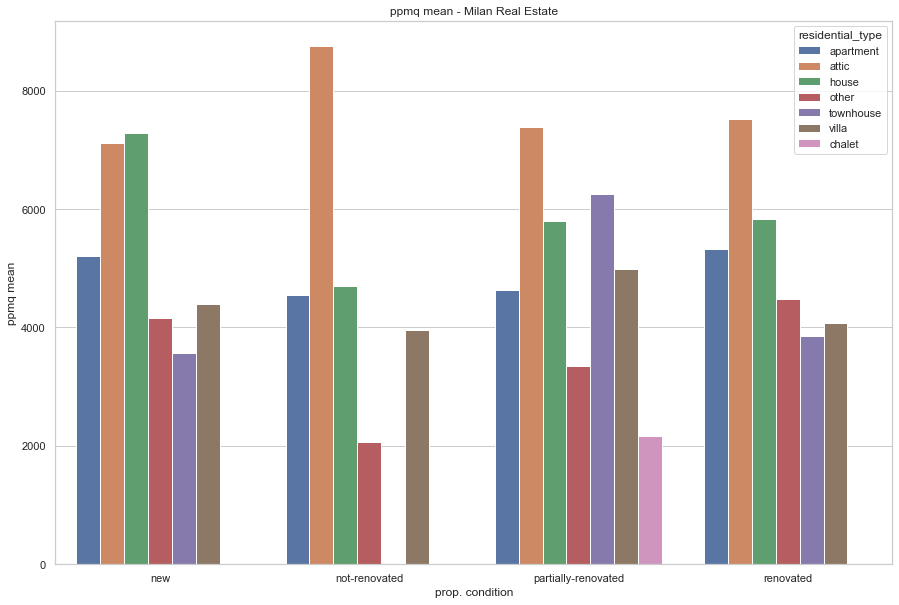

In [21]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize']=(15,10)
plot = sns.barplot(x="property_condition", y="ppmq_mean" ,hue='residential_type',data=data_viz)
plt.xlabel("prop. condition")
plt.ylabel("ppmq mean")
plt.title("ppmq mean - Milan Real Estate")
plt.show()

## Question 2
The company decided that Milan could be a good market to invest in, but they first want to discover if it is possible to develop a machine learning model to predict the price of a house given a set of features. They ask you to make a proof of concept.
> Note: the performance is not that important, focus more on the process to develop a machine learning model.


<b> Encoding - Correlation - feature selection </b>

In [172]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13480 entries, 0 to 14999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area                            13480 non-null  float64
 1   bathrooms                       13480 non-null  int32  
 2   construction_year               13480 non-null  int32  
 3   floor                           13480 non-null  int32  
 4   latitude                        13480 non-null  float64
 5   longitude                       13480 non-null  float64
 6   has_elevator                    13480 non-null  bool   
 7   property_condition              13480 non-null  object 
 8   residential_type                13480 non-null  object 
 9   rooms                           13480 non-null  int32  
 10  has_terrace                     13480 non-null  bool   
 11  building_floors                 13480 non-null  object 
 12  price                           

In [173]:
df_new3 = df_new2.copy()  


In [174]:
df_new3['has_terrace']=df_pro['has_terrace'].astype(int)
df_new3['has_elevator']=df_pro['has_elevator'].astype(int)
df_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13480 entries, 0 to 14999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   area                            13480 non-null  float64
 1   bathrooms                       13480 non-null  int32  
 2   construction_year               13480 non-null  int32  
 3   floor                           13480 non-null  int32  
 4   latitude                        13480 non-null  float64
 5   longitude                       13480 non-null  float64
 6   has_elevator                    13480 non-null  int32  
 7   property_condition              13480 non-null  object 
 8   residential_type                13480 non-null  object 
 9   rooms                           13480 non-null  int32  
 10  has_terrace                     13480 non-null  int32  
 11  building_floors                 13480 non-null  object 
 12  price                           

In [175]:
df_new3.loc[(df_new3.property_condition == 'new'),'property_condition']= 0
df_new3.loc[(df_new3.property_condition == 'not-renovated'),'property_condition']= 1
df_new3.loc[(df_new3.property_condition == 'partially-renovated'),'property_condition']= 2
df_new3.loc[(df_new3.property_condition == 'renovated'),'property_condition']= 3
df_new3.loc[(df_new3.residential_type == 'apartment'),'residential_type']= 0
df_new3.loc[(df_new3.residential_type == 'attic'),'residential_type']= 1
df_new3.loc[(df_new3.residential_type == 'house'),'residential_type']= 2
df_new3.loc[(df_new3.residential_type == 'other'),'residential_type']= 3
df_new3.loc[(df_new3.residential_type == 'townhouse'),'residential_type']= 4
df_new3.loc[(df_new3.residential_type == 'villa'),'residential_type']= 5
df_new3.loc[(df_new3.residential_type == 'chalet'),'residential_type']= 6

df_new3.head(8)

,area,bathrooms,construction_year,floor,latitude,longitude,has_elevator,property_condition,residential_type,rooms,has_terrace,building_floors,price,distance_from_airport,distance_from_canal,distance_from_cemetery,distance_from_groceries,distance_from_hospital,distance_from_prison,distance_from_restaurant,distance_from_river,distance_from_secondary_street,distance_from_tourism_landmark,distance_from_metro,distance_from_main_street,distance_from_park,distance_from_school,distance_from_train_station,distance_from_train,distance_from_tram,distance_from_university,price_per_mq
0,45.0,1,1940,0,45.471800,9.110230,0,1,0,2,1,4,65000,11345.466428,1404.625825,1521.410028,158.635151,293.206596,1903.220851,488.861064,4657.033509,229.048302,1138.150120,804.652987,498.710514,152.253625,197.741853,3625.878511,3560.987203,995.568157,4681.550378,1444.0
2,75.0,1,0,1,45.441815,9.170326,0,2,0,2,0,0,270000,6926.761801,410.660889,4790.418731,217.951447,1111.829349,2071.402265,335.159428,6811.102163,445.028628,410.660889,240.776645,171.195837,154.906790,257.979442,1253.108733,145.990066,658.097846,397.383207,3600.0
3,77.0,1,1980,0,45.472250,9.140095,1,2,0,4,0,0,60000,9033.201992,2958.045143,3065.496060,154.883926,387.977522,2222.647401,149.412372,5114.278496,904.650143,1323.919681,473.202452,317.134900,163.464322,155.500921,2795.564531,1985.518492,159.403856,2446.392566,779.0
4,38.0,1,1980,1,45.469380,9.212610,1,2,0,1,0,0,340000,3401.866879,3099.524650,3027.705058,143.194373,552.895837,2842.930728,129.543869,3223.745896,530.162140,720.320899,371.912958,351.892321,226.019753,118.750948,1416.505435,1699.217613,350.586175,761.481189,8947.0
5,90.0,1,0,1,45.442403,9.145323,0,2,0,3,0,0,259000,8794.040760,334.180058,3755.803168,606.799529,1342.559639,2594.882980,48.402563,8346.646313,180.101795,936.962252,1720.129075,1014.910936,65.318790,75.276520,1187.792561,404.578049,317.714959,1284.613824,2878.0
7,35.0,1,1960,5,45.458300,9.089900,1,3,0,1,1,5,115000,12879.907040,1343.523121,563.264212,373.855031,514.145747,1545.287195,30.826894,6384.119401,367.773477,2798.715128,1830.348859,2546.809816,20.489947,191.538445,3611.295371,2882.320889,2759.326789,5895.934784,3286.0
8,65.0,1,1940,2,45.437800,9.193000,0,2,0,2,0,2,190000,5452.064200,398.720805,3979.572293,154.435416,1823.569776,3232.003407,7.628985,5335.757421,61.795210,1410.629098,1413.432811,216.820671,138.810425,22.513962,1881.528840,813.377276,560.672657,834.423377,2923.0
9,52.0,1,0,2,45.463100,9.165500,1,3,0,2,0,3,540000,6971.181790,1111.451856,2564.208074,160.525150,439.195588,35.874050,27.159725,6833.785647,34.665319,431.813057,459.569977,1250.194941,216.230053,64.550109,976.751147,938.785543,117.591390,296.968843,10385.0


In [176]:
df_new3['property_condition'] = pd.to_numeric(df_new3['property_condition'])
df_new3['residential_type'] = pd.to_numeric(df_new3['residential_type'])
df_new3['building_floors'] = pd.to_numeric(df_new3['building_floors'])

In [177]:
df_new3.head(10)

,area,bathrooms,construction_year,floor,latitude,longitude,has_elevator,property_condition,residential_type,rooms,has_terrace,building_floors,price,distance_from_airport,distance_from_canal,distance_from_cemetery,distance_from_groceries,distance_from_hospital,distance_from_prison,distance_from_restaurant,distance_from_river,distance_from_secondary_street,distance_from_tourism_landmark,distance_from_metro,distance_from_main_street,distance_from_park,distance_from_school,distance_from_train_station,distance_from_train,distance_from_tram,distance_from_university,price_per_mq
0,45.0,1,1940,0,45.471800,9.110230,0,1,0,2,1,4.0,65000,11345.466428,1404.625825,1521.410028,158.635151,293.206596,1903.220851,488.861064,4657.033509,229.048302,1138.150120,804.652987,498.710514,152.253625,197.741853,3625.878511,3560.987203,995.568157,4681.550378,1444.0
2,75.0,1,0,1,45.441815,9.170326,0,2,0,2,0,0.0,270000,6926.761801,410.660889,4790.418731,217.951447,1111.829349,2071.402265,335.159428,6811.102163,445.028628,410.660889,240.776645,171.195837,154.906790,257.979442,1253.108733,145.990066,658.097846,397.383207,3600.0
3,77.0,1,1980,0,45.472250,9.140095,1,2,0,4,0,0.0,60000,9033.201992,2958.045143,3065.496060,154.883926,387.977522,2222.647401,149.412372,5114.278496,904.650143,1323.919681,473.202452,317.134900,163.464322,155.500921,2795.564531,1985.518492,159.403856,2446.392566,779.0
4,38.0,1,1980,1,45.469380,9.212610,1,2,0,1,0,0.0,340000,3401.866879,3099.524650,3027.705058,143.194373,552.895837,2842.930728,129.543869,3223.745896,530.162140,720.320899,371.912958,351.892321,226.019753,118.750948,1416.505435,1699.217613,350.586175,761.481189,8947.0
5,90.0,1,0,1,45.442403,9.145323,0,2,0,3,0,0.0,259000,8794.040760,334.180058,3755.803168,606.799529,1342.559639,2594.882980,48.402563,8346.646313,180.101795,936.962252,1720.129075,1014.910936,65.318790,75.276520,1187.792561,404.578049,317.714959,1284.613824,2878.0
7,35.0,1,1960,5,45.458300,9.089900,1,3,0,1,1,5.0,115000,12879.907040,1343.523121,563.264212,373.855031,514.145747,1545.287195,30.826894,6384.119401,367.773477,2798.715128,1830.348859,2546.809816,20.489947,191.538445,3611.295371,2882.320889,2759.326789,5895.934784,3286.0
8,65.0,1,1940,2,45.437800,9.193000,0,2,0,2,0,2.0,190000,5452.064200,398.720805,3979.572293,154.435416,1823.569776,3232.003407,7.628985,5335.757421,61.795210,1410.629098,1413.432811,216.820671,138.810425,22.513962,1881.528840,813.377276,560.672657,834.423377,2923.0
9,52.0,1,0,2,45.463100,9.165500,1,3,0,2,0,3.0,540000,6971.181790,1111.451856,2564.208074,160.525150,439.195588,35.874050,27.159725,6833.785647,34.665319,431.813057,459.569977,1250.194941,216.230053,64.550109,976.751147,938.785543,117.591390,296.968843,10385.0
11,44.0,1,1960,3,45.440600,9.173520,1,0,0,2,1,4.0,240000,6732.662229,142.434228,4903.443658,40.857536,1227.651838,2250.311865,161.021042,6620.218044,321.182687,142.434228,518.380201,71.345872,170.131675,463.709641,1425.766329,263.404177,396.793249,549.564549,5455.0
12,53.0,1,1940,0,45.474100,9.221160,0,1,0,2,0,0.0,200000,2968.185082,2746.250964,3137.323242,215.514307,712.645048,2263.905859,178.379002,2394.721521,202.088586,1089.271584,718.596781,299.212389,205.013757,259.775326,1636.642943,1322.779343,92.304812,205.055898,3774.0


In [178]:
corr_matrix = df_new3.corr()
corr_matrix["price"].sort_values(ascending=False)


price                             1.000000
area                              0.803170
price_per_mq                      0.655043
bathrooms                         0.623873
rooms                             0.527934
distance_from_main_street         0.284674
floor                             0.174414
distance_from_river               0.164390
has_elevator                      0.146575
residential_type                  0.106469
distance_from_canal               0.074772
distance_from_train               0.059771
has_terrace                       0.050978
building_floors                   0.013883
distance_from_park               -0.010028
property_condition               -0.012943
longitude                        -0.014462
distance_from_cemetery           -0.022997
distance_from_school             -0.029301
construction_year                -0.029474
distance_from_groceries          -0.030778
distance_from_train_station      -0.052197
distance_from_secondary_street   -0.095530
distance_fr

The correlation coefficient ranges from -1 to 1. When it is close to 1, it means that there is a strong positive corelation: for example, the price tends to go up when the floor_area goes up.
When the coefficient is close to -1, it means that there is a strong negative correlation. Coefficient close to zero means that there is no linear correlation.

In our case study we have a positive correlation with: "area"


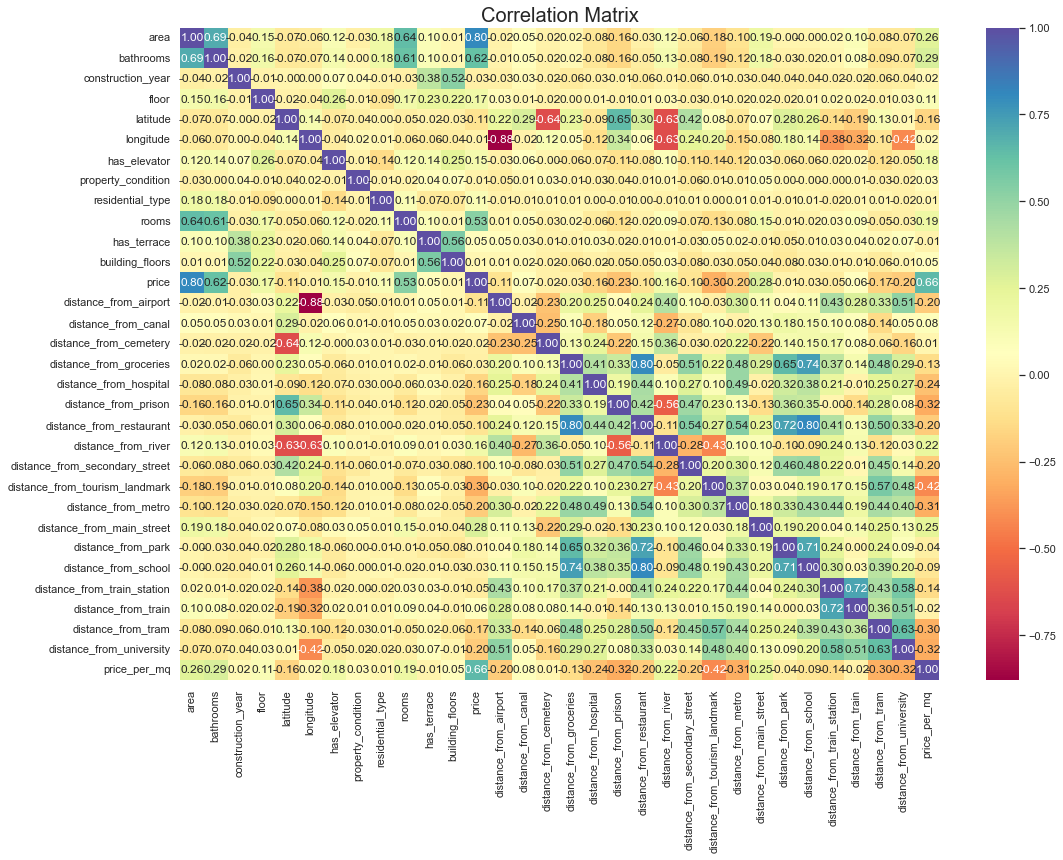

In [179]:
#matrice correlazione
f, ax = plt.subplots(figsize= [17,12])
sns.heatmap(df_new3.corr(), annot=True, fmt=".2f", ax=ax, cmap = "Spectral" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

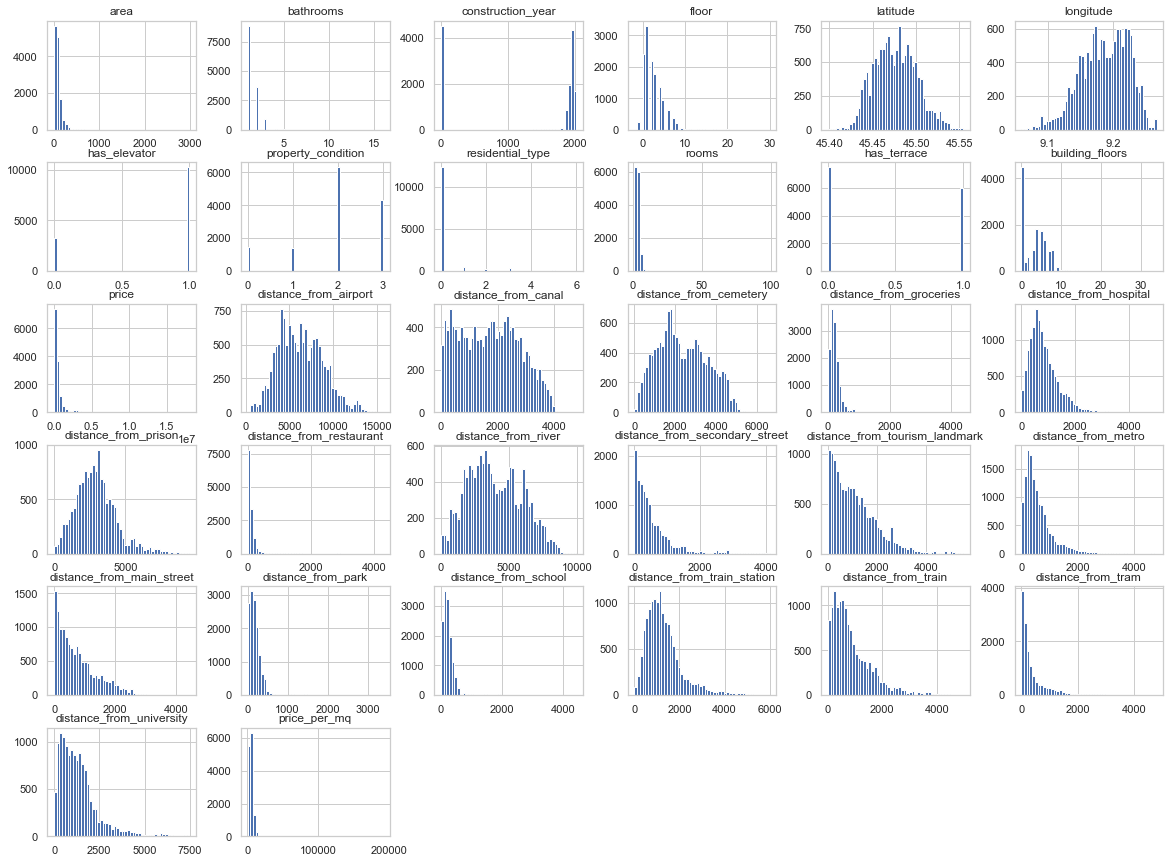

In [180]:
df_new3.hist(bins=50, figsize=(20,15))
plt.show()



C:\Users\065898758\Anaconda3\envs\projects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


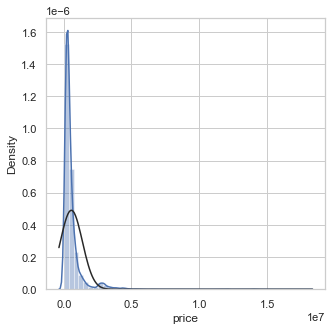

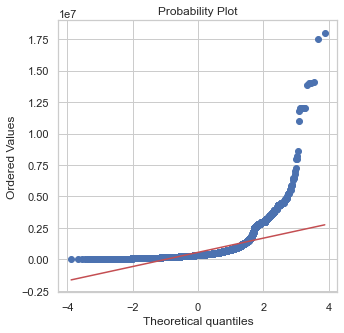

In [198]:
from scipy import stats
from scipy.stats import norm
sns.distplot(df_new3['price'],fit=norm);
fig = plt.figure()
res = stats.probplot(df_new3['price'], plot=plt)
plt.rcParams['figure.figsize']=(15,10)

<b> we check for normality and since it is needed we apply a log transf to our data </b>

In [182]:
df_check = df_new3.copy()

C:\Users\065898758\Anaconda3\envs\projects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


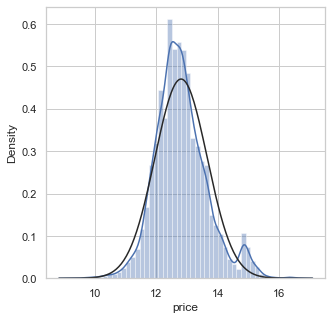

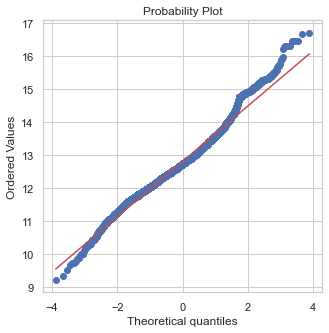

In [183]:
df_check['price'] = np.log(df_new3['price'])
sns.distplot(np.log(df_new3['price']),fit=norm);
fig = plt.figure()
res = stats.probplot(np.log(df_new3['price']), plot=plt)
plt.rcParams['figure.figsize']=(15,10)

<b> Train and split dataset | model </b>

We will train and use a model using the features that showed a higher and positive correlation to our pricing prediction.
those features are:
- area
- bathrooms
- rooms
- distance_from_main_street

we will go for a Multiple Linear Regression and test the performance.

In [184]:
import rfpimp
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from scipy import stats 
from sklearn.linear_model import LinearRegression

#data preparation
x = df_new3.drop(["price","price_per_mq"], axis = 1)
#x = df_new3[['area','bathrooms','rooms','distance_from_main_street']]
y = df_new3[['price']]




#train and test set split 80/20

#x = df_new3.drop(["price"], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)

#train

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_train, y_train)

#another check on feature importance

imp = rfpimp.importances(rf, x_train, y_train)


C:\Users\065898758\AppData\Local\Temp\ipykernel_17904\1433852477.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


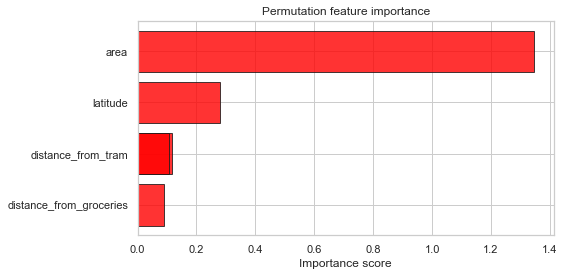

In [206]:
#graphic check

fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='red', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, '', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()
plt.rcParams['figure.figsize']=(15,10)

fig.tight_layout()

In [186]:
#train and test set split 80/20 with important features

x = df_new3[['area','distance_from_tram','distance_from_groceries','distance_from_tram','latitude']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 32)


C:\Users\065898758\AppData\Local\Temp\ipykernel_17904\678859619.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


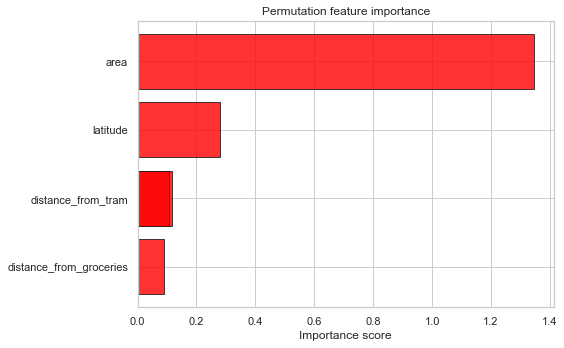

In [205]:
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(x_train, y_train)

#another check on feature importance

imp = rfpimp.importances(rf, x_train, y_train)

fig, ax = plt.subplots(figsize=(8, 5))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='red', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, '', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()
plt.rcParams['figure.figsize']=(5,5)

fig.tight_layout()

<b> now we move on the multiple linear regression </b>

<b> Prediction </b>

In [188]:
LR = LinearRegression()
#fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [189]:
y_prediction =  LR.predict(x_train)
y_prediction

array([[607698.59821252],
       [431308.92721166],
       [344809.93113369],
       ...,
       [259500.72685658],
       [853365.85361575],
       [177085.11686677]])

In [190]:
LR_2 = LinearRegression()
#fitting the training data
LR.fit(x_test,y_test)

LinearRegression()

In [191]:
y_prediction2 =  LR.predict(x_test)
y_prediction2

array([[229321.27767971],
       [523837.81934714],
       [714584.367488  ],
       ...,
       [ 94496.04798739],
       [688470.70276131],
       [423470.01363063]])

## Question 3
You finally have a working PoC, but you have to convince the company that it is worth it to invest in your machine learning solution. Explain the performance of your model with proper metrics and plots motivating your choices.
> Note: again, there is not a unique correct answer, just do your best.

<b> Metrics - Model evaluation </b>

In [207]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
# predicting the accuracy score
score=r2_score(y_train,y_prediction)
print('r2 score is' ,score)
print('mean_sqrd_error is==',mean_squared_error(y_train,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_train,y_prediction)))

r2 score is 0.6658624622616673
mean_sqrd_error is== 228109832917.5636
root_mean_squared error of is== 477608.45147208567


<b> evaluate metrics on test set </b>

In [208]:
score2=r2_score(y_test,y_prediction2)
print('r2 score is' ,score2)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction2))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction2)))

r2 score is 0.7029357041377201
mean_sqrd_error is== 166865218002.17706
root_mean_squared error of is== 408491.3928128438


C:\Users\065898758\Anaconda3\envs\projects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\065898758\Anaconda3\envs\projects\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


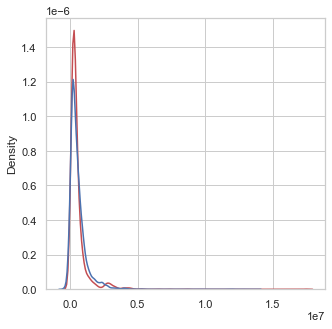

In [211]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_prediction, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.rcParams['figure.figsize']=(15,5)


<b> Explanation </b>

R Squared: R Square is the coefficient of determination. It tells us how many points fall on the regression line. The value of R Square is 7.29%, which indicates that 70.29% of the data fit the regression model.

Mean Square Error: Mean Square Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance. The mean square error obtained for this particular model is 166865218002.1, which is not good.

Root Mean Square Error: Root Mean Square Error is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance. The root mean square error obtained for this particular model is 408491.3, which is not good.

So far we are accepting the model only evaluating positively the R Squared.

## Question 4
The company is really happy about your job, but you have to improve the performance of your model if you want to put it in production. They ask you to give it a try.
> Note: we know that we said to improve the performance, but it is actually not that important again, focus more on the techniques you could apply to improve the performance.

In order to improve the model accuracy we can build a stronger model and more complex models to try to capture the remaining variance(since we way that  mean square error and root square errors are pretty high. Here are several options:

- Adding interaction terms to model how two or more independent variables together impact the target variable
- Adding polynomial terms to model the nonlinear relationship between an independent variable and the target variable(polynomial regression)
- looking for more outliers(if there are residual)
